In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\jzcap\anaconda3\envs\uncc\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(20)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,CONFIRMED,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,CONFIRMED,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,CONFIRMED,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,CONFIRMED,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.

#we're going to just keep all of them for now and let the neural net tell us which ones are significant
X = df.drop("koi_disposition", axis = 1)
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [6]:
#use koi_disposition for y_values
y = df["koi_disposition"]
y

#probe the dataset to determine what classification types exist
outcomelist = [];
for i in range(0, len(y)):
    if y[i] not in outcomelist:
        outcomelist.append(y[i])
outcomelist

print(f'Our 3 classification types are: {[i for i in outcomelist]}')

Our 3 classification types are: ['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']


# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [8]:
#split our data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
1246,0,0,0,0,3.975996,1.140000e-05,-1.140000e-05,133.622380,0.002270,-0.002270,...,-102,4.561,0.036,-0.050,0.778,0.049,-0.040,287.52963,38.894508,14.110
3909,0,0,0,0,89.722413,7.862000e-04,-7.862000e-04,163.158150,0.007060,-0.007060,...,-227,4.241,0.180,-0.180,1.262,0.335,-0.274,284.97800,41.420158,13.838
722,0,1,1,0,1.171536,9.840000e-07,-9.840000e-07,178.597581,0.000708,-0.000708,...,-406,4.275,0.078,-0.182,1.485,0.411,-0.221,297.88437,41.931252,15.634
1066,0,0,0,0,1.970340,2.280000e-06,-2.280000e-06,131.948389,0.000960,-0.000960,...,-132,3.972,0.570,-0.380,1.667,1.082,-0.983,290.54855,38.495281,14.438
4593,1,0,0,0,10.692230,7.050000e-07,-7.050000e-07,139.953907,0.000055,-0.000055,...,-180,4.490,0.054,-0.216,0.941,0.292,-0.097,282.38327,48.042782,15.507


In [10]:
#encode our outcome labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

#one-hot encode our categorical data
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [11]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
len(X_test_scaled)

1748

# Create and Train the Model



In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Configure a sequential Neural Network model with 40 inputs (one per feature column), 3 hidden layers
# output layer will classify data into one of 3 values

model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=40))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
#fit the model to our training data
model2 = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2,
    validation_data = (X_test_scaled, y_test_categorical)
)

Train on 5243 samples, validate on 1748 samples
Epoch 1/100
5243/5243 - 1s - loss: 0.8540 - accuracy: 0.6122 - val_loss: 0.5588 - val_accuracy: 0.7883
Epoch 2/100
5243/5243 - 0s - loss: 0.4623 - accuracy: 0.7725 - val_loss: 0.3828 - val_accuracy: 0.8078
Epoch 3/100
5243/5243 - 0s - loss: 0.3962 - accuracy: 0.8034 - val_loss: 0.3590 - val_accuracy: 0.8158
Epoch 4/100
5243/5243 - 0s - loss: 0.3816 - accuracy: 0.8100 - val_loss: 0.3526 - val_accuracy: 0.8432
Epoch 5/100
5243/5243 - 0s - loss: 0.3698 - accuracy: 0.8148 - val_loss: 0.3330 - val_accuracy: 0.8450
Epoch 6/100
5243/5243 - 0s - loss: 0.3608 - accuracy: 0.8152 - val_loss: 0.3249 - val_accuracy: 0.8467
Epoch 7/100
5243/5243 - 0s - loss: 0.3566 - accuracy: 0.8211 - val_loss: 0.3196 - val_accuracy: 0.8507
Epoch 8/100
5243/5243 - 0s - loss: 0.3485 - accuracy: 0.8314 - val_loss: 0.3199 - val_accuracy: 0.8352
Epoch 9/100
5243/5243 - 0s - loss: 0.3464 - accuracy: 0.8257 - val_loss: 0.3123 - val_accuracy: 0.8558
Epoch 10/100
5243/5243 - 

Epoch 80/100
5243/5243 - 0s - loss: 0.2691 - accuracy: 0.8804 - val_loss: 0.2549 - val_accuracy: 0.8993
Epoch 81/100
5243/5243 - 0s - loss: 0.2733 - accuracy: 0.8772 - val_loss: 0.2623 - val_accuracy: 0.8919
Epoch 82/100
5243/5243 - 0s - loss: 0.2658 - accuracy: 0.8846 - val_loss: 0.2545 - val_accuracy: 0.8953
Epoch 83/100
5243/5243 - 0s - loss: 0.2668 - accuracy: 0.8875 - val_loss: 0.2751 - val_accuracy: 0.8730
Epoch 84/100
5243/5243 - 0s - loss: 0.2652 - accuracy: 0.8848 - val_loss: 0.2582 - val_accuracy: 0.8959
Epoch 85/100
5243/5243 - 0s - loss: 0.2639 - accuracy: 0.8856 - val_loss: 0.2568 - val_accuracy: 0.8982
Epoch 86/100
5243/5243 - 0s - loss: 0.2638 - accuracy: 0.8858 - val_loss: 0.2544 - val_accuracy: 0.9039
Epoch 87/100
5243/5243 - 0s - loss: 0.2677 - accuracy: 0.8793 - val_loss: 0.2541 - val_accuracy: 0.9016
Epoch 88/100
5243/5243 - 0s - loss: 0.2628 - accuracy: 0.8854 - val_loss: 0.2631 - val_accuracy: 0.8970
Epoch 89/100
5243/5243 - 0s - loss: 0.2609 - accuracy: 0.8867 - 

In [14]:
#score our model using both the testing data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1748/1 - 0s - loss: 0.2473 - accuracy: 0.9016
Normal Neural Network - Loss: 0.25266659638292455, Accuracy: 0.9016018509864807


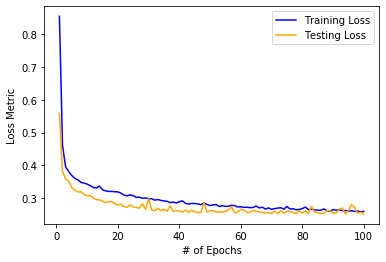

In [15]:
import matplotlib.pyplot as plt
import numpy as np

#Get training and test loss histories
training_loss = model2.history['loss']
test_loss = model2.history['val_loss']

#Create count of the number of epochs
#epoch count starts at 1...
xaxis = range(1, len(training_loss)+1)

#plot loss as a function of epochs
plt.plot(xaxis, training_loss, 'blue', label = "Training Loss")
plt.plot(xaxis, test_loss, 'orange', label = "Testing Loss")
plt.legend(loc = "best")
plt.xlabel('# of Epochs')
plt.ylabel('Loss Metric')
plt.show();

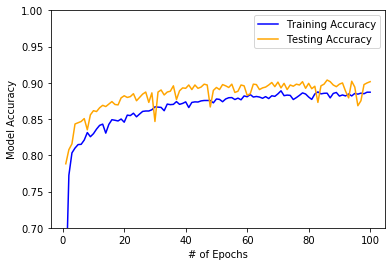

In [16]:
#Get training and testing accuracy histories
training_accuracy = model2.history['accuracy']
testing_accuracy = model2.history['val_accuracy']

#plot loss as a function of epochs
plt.plot(xaxis, training_accuracy, 'blue', label = "Training Accuracy")
plt.plot(xaxis, testing_accuracy, 'orange', label = "Testing Accuracy")
plt.legend(loc = "best")
plt.ylim(0.7, 1)
plt.xlabel('# of Epochs')
plt.ylabel('Model Accuracy')
plt.show();


In [17]:
predictions = model.predict_classes(X_test_scaled)
predictionLabels = label_encoder.inverse_transform(predictions)

modeloutputcomparison = pd.DataFrame({"Predicted": predictionLabels, "Actual": y_test})
modeloutputcomparison.head(20)

#count = 0
#for i in range(0,len(modeloutputcomparison)):
#    if (modeloutputcomparison["Predicted"][i] == modeloutputcomparison["Actual"][i]):
#        count += 1
#print(f' Accuracy: %2f' % ((count/len(modeloutputcomparison))*100))


,Predicted,Actual
5737,FALSE POSITIVE,FALSE POSITIVE
3229,FALSE POSITIVE,FALSE POSITIVE
4464,CANDIDATE,CANDIDATE
700,FALSE POSITIVE,CONFIRMED
2852,CONFIRMED,CANDIDATE
1571,FALSE POSITIVE,CANDIDATE
5919,CANDIDATE,CANDIDATE
3968,FALSE POSITIVE,FALSE POSITIVE
2475,CONFIRMED,CONFIRMED
5520,FALSE POSITIVE,FALSE POSITIVE


# Save the Model

In [30]:
#this breaks
import joblib
joblib.dump(model2, 'test.sav')

TypeError: can't pickle _thread._local objects

# Summary

This Neural Network model is a fairly good predictor of Exoplanet status (approx 88-90% accuracy with a 0.25 - .27 loss metric). Without having any prior knowledge of the dataset it was not immediately clear which feature columns would be of the greatest importance, so I allowed the neural network to use all 40 features as inputs. Several model configurations were tested (# of layers, # of units per layer, training epochs), and this configuration yielded the best accuracy with lowest loss metric among configurations tested. While other configurations were able to obtain a higher accuracy percentage (namely more hidden layers with more nodes), these models also exhibited large loss metrics (on the order of 0.7 to 0.8), thereby indicating that the model was either overfitting or memorizing the training data.

This model would still further benefit from hyperparameter tuning as there is a moderate amount of variability in the accuracy percentage from run-to-run. There is a fine line between overfitting the model to the large number of inputs by having too many hidden layers or too many nodes per hidden layer. The current model configuration does converge to a reasonable accuracy and loss metric, however other models tested that were fairly similar exhibited diverging loss metrics.

Regardless, this model can be reasonably expected to produce accurate predictions on both the testing and training data.